### Proyecto final: Calculo del Indice de Prosperidad Sostenible aplicando Tecnicas y herramientas para el analisis de datos
#### Recoleccion de datos

In [1]:
# Importando librerias necesarias para el proyecto
import pandas as pd 
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

In [2]:
# Definiendo la conexion para la base de datos PostgreSql, con las credenciales asignadas:
DATABASE_URL = ""

engine = create_engine(DATABASE_URL)

In [3]:
# Script sql para obtener los paises asignados a cada estudiante
sql_query = "select * from country_info where num_ci = 4243879"

# Importamos el set de datos obtenidos al dataframe 'df_paises' 
df_paises = pd.read_sql(sql_query, con=engine)

In [4]:
# listado de paises asignados
df_paises

,id,country_name,country_code,region,income_group,num_ci
0,52,Bangladesh,BGD,South Asia,Lower middle income,4243879
1,93,Eritrea,ERI,Sub-Saharan Africa,Low income,4243879
2,134,Kazakhstan,KAZ,Europe & Central Asia,Upper middle income,4243879
3,175,New Caledonia,NCL,East Asia & Pacific,High income,4243879
4,216,Slovenia,SVN,Europe & Central Asia,High income,4243879


In [5]:
# Consulta sql para obtener los datos de la tabla 'indicator'
sql_query = "select * from indicator"

# Importamos el set de datos obtenidos al dataframe 'df_indicadores' 
df_indicadores = pd.read_sql(sql_query, con=engine)

In [6]:
# listado de indicadores
df_indicadores

,id,indicator_name,indicator_code,topic
0,1,Example Indicator,EXI,Example Topic
1,34,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...
2,35,Gini index,SI.POV.GINI,Poverty: Income distribution
3,36,Poverty gap at $3.65 a day (2017 PPP) (%),SI.POV.LMIC.GP,Poverty: Poverty rates
4,37,"Population, total",SP.POP.TOTL,Health: Population: Structure
5,38,Sustainable Prosperity Index,SI.PROSP.IDX,Human: Prosperity
6,39,Indice de Progreso Social,IPS,Desarrollo Social


In [7]:

# Script sql para obtener los indicadores de los paises asignados para el trabajo
# se va a tomar el id del pais para poder filtrar
sql_query = "select * from yearly_value where country_info_id in (52,93,134,175,216)"

# Importamos el set de datos obtenidos al dataframe 'df_paises_indicad' 
df_paises_indicad = pd.read_sql(sql_query, con=engine)


In [8]:
# mostrando los primeros registros
df_paises_indicad.head()

,id,year,value,country_info_id,indicator_id
0,73,2000,6.462631e+02,52,34
1,74,2000,3.340000e+01,52,35
2,75,2000,1.291933e+08,52,37
3,76,2000,2.700000e+01,52,36
4,185,2000,7.936206e+02,93,34


In [9]:
# mostrando los ultimos registros
df_paises_indicad.tail()

,id,year,value,country_info_id,indicator_id
332,22008,2017,-0.25333,216,38
333,22009,2018,-0.26723,216,38
334,22010,2019,-0.27051,216,38
335,22011,2020,-0.25122,216,38
336,22012,2021,-0.27396,216,38


In [10]:
# Nro de filas y columnas de los indicadores para los 4 paises
df_paises_indicad.shape

(337, 5)

In [11]:
# tipos de datos de los campos del dataframe
df_paises_indicad.dtypes

id                   int64
year                 int64
value              float64
country_info_id      int64
indicator_id         int64
dtype: object

In [12]:
# identificando si hay valores nulos en el conjunto de datos
df_paises_indicad.isnull().sum()

id                 0
year               0
value              0
country_info_id    0
indicator_id       0
dtype: int64

In [13]:
# verificando si hay algun null en el set de datos
aux = df_paises_indicad[df_paises_indicad.isnull().any(axis=1)]

In [14]:
# Verificar si los registros estan completos
aux = df_paises_indicad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               337 non-null    int64  
 1   year             337 non-null    int64  
 2   value            337 non-null    float64
 3   country_info_id  337 non-null    int64  
 4   indicator_id     337 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 13.3 KB


Los datos ya estan verificados para poder trabajarlos.

De la tabla 'yearly_value' se va a obtener los datos de los indicadores
 por año, pais y que contengan solo los cuatro indicadores.

In [15]:
# indicadores para Bangladesh con id 52
sql_query ="select * from yearly_value where country_info_id  = 52 and indicator_id in (34,35,36,37) and year in (select year from yearly_value where country_info_id  = 52 and indicator_id in (34,35,36,37) group by year having count(year)>=4)"
df_bgd = pd.read_sql(sql_query, con=engine)

In [16]:
df_bgd.head()

,id,year,value,country_info_id,indicator_id
0,73,2000,6.462631e+02,52,34
1,74,2000,3.340000e+01,52,35
2,76,2000,2.700000e+01,52,36
3,75,2000,1.291933e+08,52,37
4,2721,2005,7.591546e+02,52,34


In [17]:
# nro de registros con las variables completas para Bangladesh
df_bgd.shape[0]

20

In [18]:
# indicadores para Eritrea con id 93
sql_query ="select * from yearly_value where country_info_id  = 93 and indicator_id in (34,35,36,37) and year in (select year from yearly_value where country_info_id  = 93 and indicator_id in (34,35,36,37) group by year having count(year)>=4)"
df_eri = pd.read_sql(sql_query, con=engine)

In [19]:
df_eri.head()

,id,year,value,country_info_id,indicator_id


In [20]:
# No hay registros con las variables completas para Eritrea
df_eri.shape[0]

0

In [21]:
# indicadores para Kazakhstan con id 134
sql_query ="select * from yearly_value where country_info_id  = 134 and indicator_id in (34,35,36,37) and year in (select year from yearly_value where country_info_id  = 134 and indicator_id in (34,35,36,37) group by year having count(year)>=4)"
df_kaz = pd.read_sql(sql_query, con=engine)

df_kaz.head()

,id,year,value,country_info_id,indicator_id
0,787,2001,5.055313e+03,134,34
1,788,2001,3.600000e+01,134,35
2,790,2001,1.220000e+01,134,36
3,789,2001,1.485834e+07,134,37
4,1302,2002,5.550505e+03,134,34


In [22]:
# nro de registros con las variables completas para Kazakhstan
df_kaz.shape[0]

84

In [23]:
# indicadores para New Caledonia con id 175
sql_query ="select * from yearly_value where country_info_id  = 175 and indicator_id in (34,35,36,37) and year in (select year from yearly_value where country_info_id  = 175 and indicator_id in (34,35,36,37) group by year having count(year)>=4)"
df_ncl = pd.read_sql(sql_query, con=engine)

df_ncl.head()

,id,year,value,country_info_id,indicator_id


In [24]:
# No hay registros con las variables completas para Eritrea
df_ncl.shape[0]

0

In [27]:
# indicadores para Slovenia con id 216
sql_query ="select * from yearly_value where country_info_id  = 216 and indicator_id in (34,35,36,37) and year in (select year from yearly_value where country_info_id  = 216 and indicator_id in (34,35,36,37) group by year having count(year)>=4)"
df_svn = pd.read_sql(sql_query, con=engine)

df_svn.head()

,id,year,value,country_info_id,indicator_id
0,2573,2004,1.856756e+04,216,34
1,2574,2004,2.480000e+01,216,35
2,2576,2004,1.000000e-01,216,36
3,2575,2004,1.997012e+06,216,37
4,3142,2005,1.923940e+04,216,34


In [28]:
# nro de registros con las variables completas para Kazakhstan
df_svn.shape[0]

72

In [29]:
# Uniendo los dataframes con las variables completas
df_procesar = pd.concat([df_bgd,df_kaz,df_svn], axis=0)


In [30]:
df_procesar

,id,year,value,country_info_id,indicator_id
0,73,2000,6.462631e+02,52,34
1,74,2000,3.340000e+01,52,35
2,76,2000,2.700000e+01,52,36
3,75,2000,1.291933e+08,52,37
4,2721,2005,7.591546e+02,52,34
...,...,...,...,...,...
67,11856,2020,2.102419e+06,216,37
68,12413,2021,2.478679e+04,216,34
69,12414,2021,2.430000e+01,216,35
70,12416,2021,0.000000e+00,216,36


#### Proceso para agrupar y acomodar los campos de indicadores => en una sola fila para cada pais año e indicadores

In [31]:
# creando una columna con los nombres de los parametros
df_procesar['indicador_parametro'] = df_procesar['indicator_id'].map({34:'param_Y',35:'param_G',36:'param_pow',37:'param_P'})
df_procesar.tail()

,id,year,value,country_info_id,indicator_id,indicador_parametro
67,11856,2020,2.102419e+06,216,37,param_P
68,12413,2021,2.478679e+04,216,34,param_Y
69,12414,2021,2.430000e+01,216,35,param_G
70,12416,2021,0.000000e+00,216,36,param_pow
71,12415,2021,2.108079e+06,216,37,param_P


In [32]:
# Definiendo nuevo df auxiliar
df_procesar_aux = df_procesar[['id','country_info_id','year','indicador_parametro','value']]


df_procesar_aux.head()

,id,country_info_id,year,indicador_parametro,value
0,73,52,2000,param_Y,6.462631e+02
1,74,52,2000,param_G,3.340000e+01
2,76,52,2000,param_pow,2.700000e+01
3,75,52,2000,param_P,1.291933e+08
4,2721,52,2005,param_Y,7.591546e+02


In [33]:
df_procesar_aux.shape

(176, 5)

In [39]:
# Aplicando el piot
# Agrupando las filas por cod_pais, año y sus indicadores
df_agrupado = df_procesar_aux.pivot(index=['country_info_id', 'year'],columns='indicador_parametro', values='value')

df_agrupado.head()


indicador_parametro   param_G      param_P      param_Y  param_pow
country_info_id year                                              
52              2000     33.4  129193327.0   646.263073       27.0
                2005     33.2  140912590.0   759.154640       22.0
                2010     32.1  148391139.0   967.898523       18.3
                2016     32.4  159784568.0  1308.188406       15.0
                2022     33.4  171186372.0  1785.361317        7.3

In [40]:
# cambiando actualizando nombre column
df_agrupado = df_agrupado.reset_index(level=[0,1])

In [42]:
df_agrupado.head()

indicador_parametro,country_info_id,year,param_G,param_P,param_Y,param_pow
0,52,2000,33.4,129193327.0,646.263073,27.0
1,52,2005,33.2,140912590.0,759.154640,22.0
2,52,2010,32.1,148391139.0,967.898523,18.3
3,52,2016,32.4,159784568.0,1308.188406,15.0
4,52,2022,33.4,171186372.0,1785.361317,7.3


In [43]:
# tipo de datos del df
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_info_id  44 non-null     int64  
 1   year             44 non-null     int64  
 2   param_G          44 non-null     float64
 3   param_P          44 non-null     float64
 4   param_Y          44 non-null     float64
 5   param_pow        44 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.2 KB


In [44]:
# Obteniendo el indice de prosperidad en un nuevo campo "IPS"
df_agrupado['IPS']=(df_agrupado['param_Y']/df_agrupado['param_P'])*(1-df_agrupado['param_G'])*(1-df_agrupado['param_pow'])
df_agrupado.head()

indicador_parametro,country_info_id,year,param_G,param_P,param_Y,param_pow,IPS
0,52,2000,33.4,129193327.0,646.263073,27.0,0.004214
1,52,2005,33.2,140912590.0,759.154640,22.0,0.003643
2,52,2010,32.1,148391139.0,967.898523,18.3,0.003509
3,52,2016,32.4,159784568.0,1308.188406,15.0,0.003599
4,52,2022,33.4,171186372.0,1785.361317,7.3,0.002129


In [45]:
# redondeando a 5 decimales el resultado final
df_agrupado['IPS'] = pd.Series([round(val,5) for val in df_agrupado['IPS']])
df_agrupado.head()

indicador_parametro,country_info_id,year,param_G,param_P,param_Y,param_pow,IPS
0,52,2000,33.4,129193327.0,646.263073,27.0,0.00421
1,52,2005,33.2,140912590.0,759.154640,22.0,0.00364
2,52,2010,32.1,148391139.0,967.898523,18.3,0.00351
3,52,2016,32.4,159784568.0,1308.188406,15.0,0.00360
4,52,2022,33.4,171186372.0,1785.361317,7.3,0.00213


#### Adicionando las columnas del user asignado y nombre de los paises

In [47]:
df_agrupado['usuario']='4243879'
df_agrupado.head()

indicador_parametro,country_info_id,year,param_G,param_P,param_Y,param_pow,IPS,usuario
0,52,2000,33.4,129193327.0,646.263073,27.0,0.00421,4243879
1,52,2005,33.2,140912590.0,759.154640,22.0,0.00364,4243879
2,52,2010,32.1,148391139.0,967.898523,18.3,0.00351,4243879
3,52,2016,32.4,159784568.0,1308.188406,15.0,0.00360,4243879
4,52,2022,33.4,171186372.0,1785.361317,7.3,0.00213,4243879


In [48]:
# asignando los nombres de los paises por el codigo
df_agrupado['pais_asignado'] = df_agrupado['country_info_id'].map({52:'Bangladesh',93:'Eritrea',134:'Kazakhstan',175:'New Caledonia',216:'Slovenia'})
df_agrupado.head()

indicador_parametro,country_info_id,year,param_G,param_P,param_Y,param_pow,IPS,usuario,pais_asignado
0,52,2000,33.4,129193327.0,646.263073,27.0,0.00421,4243879,Bangladesh
1,52,2005,33.2,140912590.0,759.154640,22.0,0.00364,4243879,Bangladesh
2,52,2010,32.1,148391139.0,967.898523,18.3,0.00351,4243879,Bangladesh
3,52,2016,32.4,159784568.0,1308.188406,15.0,0.00360,4243879,Bangladesh
4,52,2022,33.4,171186372.0,1785.361317,7.3,0.00213,4243879,Bangladesh


In [49]:
df_agrupado.shape

(44, 9)

In [50]:
sw =0
for indice, fila in df_agrupado.iterrows():
    #print(fila['year'],fila['IPS'],fila['country_info_id'])
    if sw == 0:
        print('----------------------------------------------------------')
        print(f"CI:                  {fila['usuario']}")
        print("---------------------------------------------------------")
        print(f"Pais Asignado          Año      Indice de Prosperidad")
        print("---------------------------------------------------------")
        sw =1
    print(f"{fila['pais_asignado']}            {fila['year']}            {fila['IPS']}")

----------------------------------------------------------
CI:                  4243879
---------------------------------------------------------
Pais Asignado          Año      Indice de Prosperidad
---------------------------------------------------------
Bangladesh            2000            0.00421
Bangladesh            2005            0.00364
Bangladesh            2010            0.00351
Bangladesh            2016            0.0036
Bangladesh            2022            0.00213
Kazakhstan            2001            0.13337
Kazakhstan            2002            0.10858
Kazakhstan            2003            0.0862
Kazakhstan            2004            0.05265
Kazakhstan            2005            0.14296
Kazakhstan            2006            0.01047
Kazakhstan            2007            -0.00317
Kazakhstan            2008            -0.00596
Kazakhstan            2009            -0.0043
Kazakhstan            2010            -0.00743
Kazakhstan            2011            -0.0124
Kazak

c:\Users\fred\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


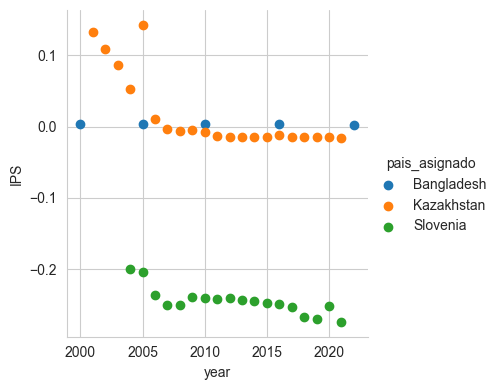

In [51]:
#GRAFICO
sns.set_style('whitegrid')
sns.FacetGrid(df_agrupado, hue='pais_asignado', height=4) \
   .map(plt.scatter, 'year', 'IPS') \
   .add_legend()
plt.show()

In [50]:
# Subida de datos

In [52]:
# Create a base class for the declarative model
# Crear una clase base para el modelo declarativo
Base = declarative_base()

C:\Users\fred\AppData\Local\Temp\ipykernel_13876\912282622.py:3: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [53]:
# Define the country_info table
class CountryInfo(Base):
    __tablename__ = 'country_info'
    id = Column(Integer, primary_key=True, autoincrement=True)
    country_name = Column(String, nullable=False)
    country_code = Column(String, unique=True, nullable=False)
    region = Column(String, nullable=False)
    income_group = Column(String, nullable=False)
    num_ci = Column(Integer, nullable=False)
    
    yearly_values = relationship("YearlyValue", back_populates="country_info")

In [54]:
# Define the indicator table
# Definir la tabla de indicadores.
class Indicator(Base):
    __tablename__ = 'indicator'
    id = Column(Integer, primary_key=True, autoincrement=True)
    indicator_name = Column(String, nullable=False)
    indicator_code = Column(String, unique=True, nullable=False)
    topic = Column(String, nullable=False)
    
    yearly_values = relationship("YearlyValue", back_populates="indicator")

In [55]:
# Definir la tabla de valores_anuales
class YearlyValue(Base):
    __tablename__ = 'yearly_value'
    id = Column(Integer, primary_key=True, autoincrement=True)
    year = Column(Integer, nullable=False)
    value = Column(Float, nullable=False)
    country_info_id = Column(Integer, ForeignKey('country_info.id'), nullable=False)
    indicator_id = Column(Integer, ForeignKey('indicator.id'), nullable=False)

    country_info = relationship("CountryInfo", back_populates="yearly_values")
    indicator = relationship("Indicator", back_populates="yearly_values")

In [56]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

In [100]:
# para insertar los resultados obtenidos

new_yearly_value = YearlyValue(
    year=2021,
    value=-0.27396,
    country_info_id=216,
    indicator_id=38
)
session.add(new_yearly_value)
session.commit()